### Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import warnings
import glob
warnings.filterwarnings('ignore')

In [2]:
## Part 1: Graph for Crypto Data only

### 1.1 Calculate the correlation matrix

*cor_matrix* contains the full correlation matrix. The table below shows a snapshot of the first 5 rows.

In [3]:
#Read in cryptocurrency Data
crypto_data = pd.DataFrame()
crypto_path = glob.glob("./Dataset/Crypto/*.csv")
crypto_index = 0
for crypto_file in crypto_path:
    if crypto_index == 0:
        crypto_csv = pd.read_csv(crypto_file, usecols = ['Date','Close'])
        crypto_csv.rename(columns={'Close': str(crypto_file)[17:-4]}, inplace=True)
        crypto_data = crypto_data.append(crypto_csv)
    else:
        crypto_csv = pd.read_csv(crypto_file, usecols = ['Close'])
        crypto_data[str(crypto_file)[17:-4]] = crypto_csv
    crypto_index += 1

crypto_data.head(-1)

Date       BNB       BTC      DOGE      ETH      XRP
0     7/1/2019   33.2777  10624.93  0.003270   295.07  0.40691
1     7/2/2019   31.9777  10842.85  0.003162   291.48  0.39794
2     7/3/2019   32.5220  11940.00  0.003343   301.14  0.40456
3     7/4/2019   33.0888  11145.67  0.003180   282.73  0.38723
4     7/5/2019   32.5566  10970.73  0.003870   287.47  0.37881
..         ...       ...       ...       ...      ...      ...
724  6/24/2021  308.6200  34663.09  0.263770  1989.52  0.67310
725  6/25/2021  280.8100  31584.45  0.237450  1808.82  0.61110
726  6/26/2021  279.6500  32283.65  0.245830  1829.64  0.61620
727  6/27/2021  290.8700  34700.34  0.264500  1982.28  0.64840
728  6/28/2021  290.0000  34494.89  0.257070  2084.41  0.64440

[729 rows x 6 columns]

### 1.11 Craetes Pearson Correlation Matrix

In [4]:
pearson_cor_matrix = crypto_data.iloc[:,1:].corr(method="pearson")
#shows the first 5 rows
pearson_cor_matrix.head()

BNB       BTC      DOGE       ETH       XRP
BNB   1.000000  0.848632  0.881525  0.937234  0.937408
BTC   0.848632  1.000000  0.629600  0.907544  0.767500
DOGE  0.881525  0.629600  1.000000  0.875078  0.863281
ETH   0.937234  0.907544  0.875078  1.000000  0.882606
XRP   0.937408  0.767500  0.863281  0.882606  1.000000

In [5]:
#Extracts all the cryptocurrency's name
crypto_names = pearson_cor_matrix.index.values

In [6]:
#Changes from dataframe to matrix, so it is easier to create a graph with networkx
pearson_cor_matrix = np.asmatrix(pearson_cor_matrix)

### 1.12 Craetes Kendall Correlation Matrix

In [7]:
#craetes Pearson correlation matrix
kendall_cor_matrix = crypto_data.iloc[:,1:].corr(method="kendall")
#shows the first 5 rows
kendall_cor_matrix.head()

BNB       BTC      DOGE       ETH       XRP
BNB   1.000000  0.804085  0.769066  0.758070  0.704335
BTC   0.804085  1.000000  0.760798  0.806039  0.619001
DOGE  0.769066  0.760798  1.000000  0.777838  0.677216
ETH   0.758070  0.806039  0.777838  1.000000  0.581592
XRP   0.704335  0.619001  0.677216  0.581592  1.000000

In [8]:
#Changes from dataframe to matrix, so it is easier to create a graph with networkx
kendall_cor_matrix = np.asmatrix(kendall_cor_matrix)

### 1.13 Craetes Spearman Correlation Matrix

In [9]:
#craetes Pearson correlation matrix
spearman_cor_matrix = crypto_data.iloc[:,1:].corr(method="spearman")
#shows the first 5 rows
spearman_cor_matrix.head()

BNB       BTC      DOGE       ETH       XRP
BNB   1.000000  0.950141  0.914980  0.903232  0.873508
BTC   0.950141  1.000000  0.915904  0.944023  0.812498
DOGE  0.914980  0.915904  1.000000  0.919694  0.842193
ETH   0.903232  0.944023  0.919694  1.000000  0.744551
XRP   0.873508  0.812498  0.842193  0.744551  1.000000

In [10]:
#Changes from dataframe to matrix, so it is easier to create a graph with networkx
spearman_cor_matrix = np.asmatrix(spearman_cor_matrix)

### 1.2 Create correlation graph for crypto data

In [11]:
#Pearson
#Crates graph using the data of the correlation matrix
PG = nx.from_numpy_matrix(pearson_cor_matrix)
#relabels the nodes to match the  stocks names
PG = nx.relabel_nodes(PG,lambda x: crypto_names[x])
                      
#Kendall                      
#Crates graph using the data of the correlation matrix
KG = nx.from_numpy_matrix(kendall_cor_matrix)
#relabels the nodes to match the  stocks names
KG = nx.relabel_nodes(KG,lambda x: crypto_names[x])

#Spearman                      
#Crates graph using the data of the correlation matrix
SG = nx.from_numpy_matrix(spearman_cor_matrix)
#relabels the nodes to match the  stocks names
SG = nx.relabel_nodes(SG,lambda x: crypto_names[x])

In [12]:
#function to create and display networks from the correlatin matrix. 

def create_corr_network(G, corr_direction, min_correlation):
    ##Creates a copy of the graph
    H = G.copy()
    
    ##Checks all the edges and removes some based on corr_direction
    for stock1, stock2, weight in G.edges(data=True):
        ##if we only want to see the positive correlations we then delete the edges with weight smaller than 0        
        if corr_direction == "positive":
            ####it adds a minimum value for correlation. 
            ####If correlation weaker than the min, then it deletes the edge
            if weight["weight"] <0 or weight["weight"] < min_correlation:
                H.remove_edge(stock1, stock2)
            #Remove edge start and end with same node
            if stock1 == stock2:
                H.remove_edge(stock1, stock2)
        ##this part runs if the corr_direction is negative and removes edges with weights equal or largen than 0
        else:
            ####it adds a minimum value for correlation. 
            ####If correlation weaker than the min, then it deletes the edge
            if weight["weight"] >=0 or weight["weight"] > min_correlation:
                H.remove_edge(stock1, stock2)
                
    
    #crates a list for edges and for the weights
    edges,weights = zip(*nx.get_edge_attributes(H,'weight').items())
    
    ### increases the value of weights, so that they are more visible in the graph
    weights = tuple([(1+abs(x))**2 for x in weights])
    
    #####calculates the degree of each node
    d = nx.degree(H)
    #####creates list of nodes and a list their degrees that will be used later for their sizes
    nodelist, node_sizes = zip(*d)

    #positions
    positions=nx.circular_layout(H)
    
    #Figure size
    plt.figure(figsize=(15,15))

    #draws nodes
    nx.draw_networkx_nodes(H,positions,node_color='#DA70D6',nodelist=nodelist,
                           #####the node size will be now based on its degree
                           node_size=tuple([x**3 for x in node_sizes]),alpha=0.8)
    
    #Styling for labels
    nx.draw_networkx_labels(H, positions, font_size=8, 
                            font_family='sans-serif')
    
    ###edge colors based on weight direction
    if corr_direction == "positive":
        edge_colour = plt.cm.GnBu 
    else:
        edge_colour = plt.cm.PuRd
        
    #draws the edges
    nx.draw_networkx_edges(H, positions, edgelist=edges,style='solid',
                          ###adds width=weights and edge_color = weights 
                          ###so that edges are based on the weight parameter 
                          ###edge_cmap is for the color scale based on the weight
                          ### edge_vmin and edge_vmax assign the min and max weights for the width
                          width=weights, edge_color = weights, edge_cmap = edge_colour,
                          edge_vmin = min(weights), edge_vmax=max(weights))

    # displays the graph without axis
    plt.axis('off')
    #saves image
    plt.savefig("NewPart" + corr_direction + ".png", format="PNG")
    plt.show() 

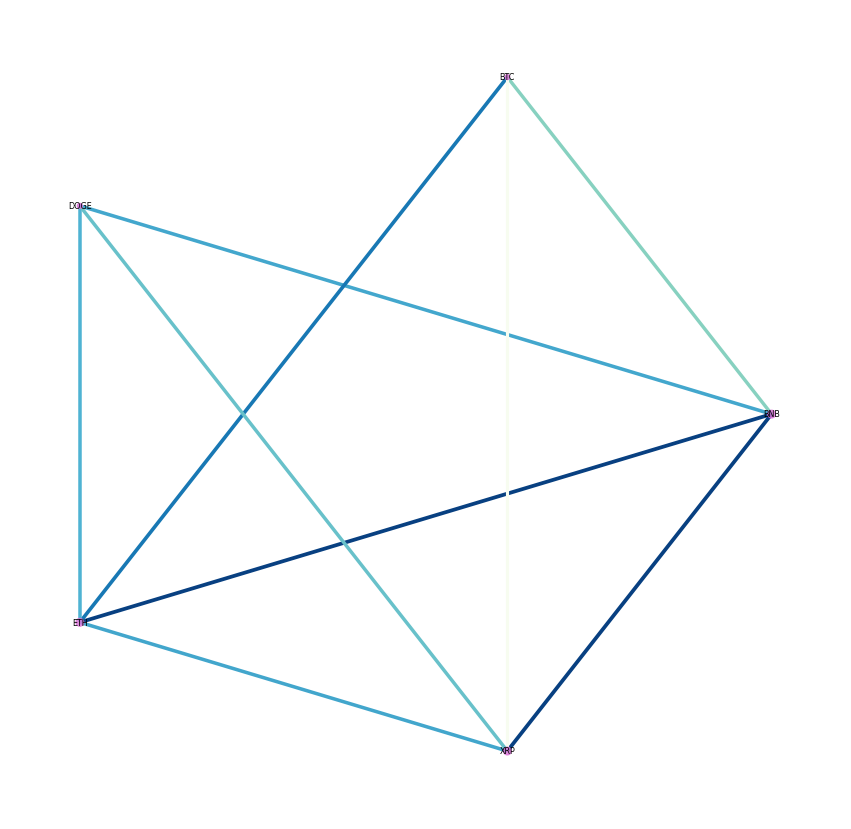

In [13]:
create_corr_network(PG, corr_direction="positive",min_correlation=0.7)

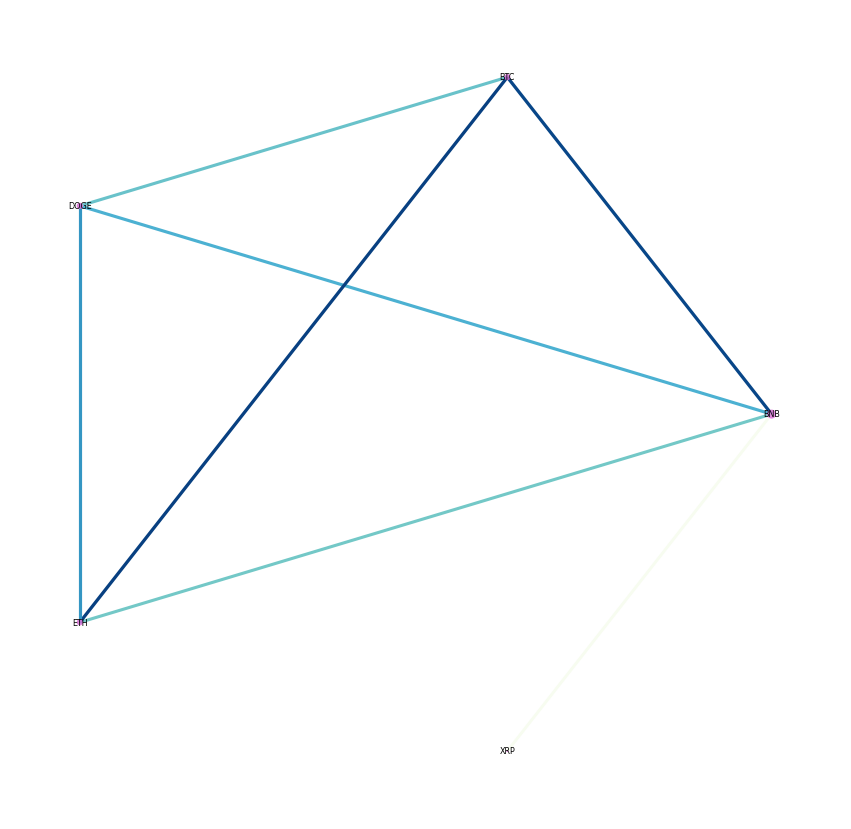

In [14]:
create_corr_network(KG, corr_direction="positive",min_correlation=0.7)

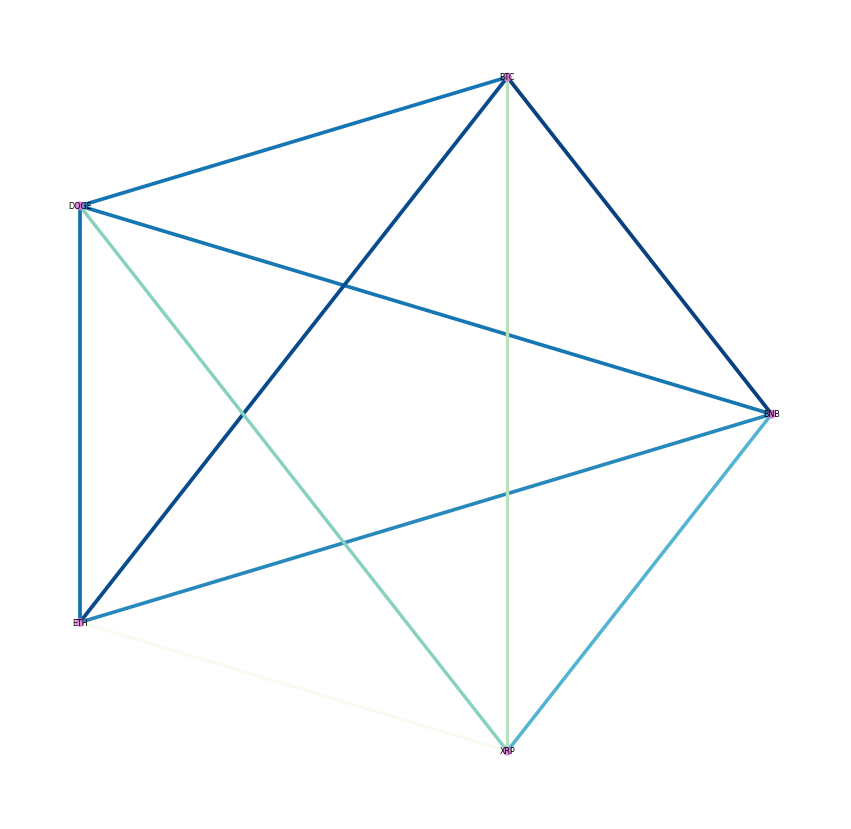

In [15]:
create_corr_network(SG, corr_direction="positive",min_correlation=0.7)

In [16]:
## Part 2: Graph for all data

### 2.1 Calculate the correlation matrix

*cor_matrix* contains the full correlation matrix. The table below shows a snapshot of the first 5 rows.

In [17]:
#Read in all Data
all_data = pd.DataFrame()
file_paths = [glob.glob("./Dataset/Crypto/*.csv"), glob.glob("./Dataset/Stocks/*.csv"), glob.glob("./Dataset/Commodities/*.csv")]
file_index = 0
for files in file_paths:
    for f in files:
        if file_index == 0:
            csv = pd.read_csv(f, usecols = ['Date','Close'])
            csv.rename(columns={'Close': str(f)[17:-4]}, inplace=True)
            all_data = all_data.append(csv)
        else:
            csv = pd.read_csv(f, usecols = ['Date','Close'])
            if file_paths.index(files) == 2:
                csv.rename(columns={'Close': str(f)[22:-4]}, inplace=True)
            else:
                csv.rename(columns={'Close': str(f)[17:-4]}, inplace=True)
            all_data = pd.merge(all_data, csv, on="Date", how = "inner")
        file_index += 1

all_data.head(-1)

Date       BNB       BTC      DOGE      ETH      XRP        AAPL  \
0    7/23/2020   18.7500   9603.27  0.003300   275.30  0.20851   92.845001   
1    7/24/2020   19.1853   9537.80  0.003211   279.15  0.20392   92.614998   
2    7/27/2020   19.7474  11029.96  0.003169   321.93  0.22437   94.809998   
3    7/28/2020   20.1732  10906.27  0.003188   316.77  0.23029   93.252502   
4    7/29/2020   19.8990  11100.53  0.003166   317.71  0.24327   95.040001   
..         ...       ...       ...       ...      ...      ...         ...   
220  6/21/2021  270.7600  31608.93  0.178730  1885.49  0.60670  132.300003   
221  6/22/2021  262.1000  32509.56  0.190720  1879.28  0.54680  133.979996   
222  6/23/2021  296.2500  33678.07  0.234680  1968.14  0.63830  133.699997   
223  6/24/2021  308.6200  34663.09  0.263770  1989.52  0.67310  133.410004   
224  6/25/2021  280.8100  31584.45  0.237450  1808.82  0.61110  133.110001   

            AMZN        ARKK        BAC  ...   VYGR        WFC         WMT  \
0    2986.550049   80.470001  24.540001  ...  12.52  26.350000  131.639999   
1    3008.909912   78.830002  24.350000  ...  12.05  26.260000  131.240005   
2    3055.209961   81.970001  24.139999  ...  12.25  25.490000  131.210007   
3    3000.330078   79.349998  24.360001  ...  11.80  25.530001  131.759995   
4    3033.530029   80.070000  25.270000  ...  11.34  25.780001  130.690002   
..           ...         ...        ...  ...    ...        ...         ...   
220  3453.959961  119.510002  39.750000  ...   4.40  43.279999  136.399994   
221  3505.439941  121.019997  39.970001  ...   4.23  43.540001  137.029999   
222  3503.820068  123.529999  40.200001  ...   4.38  43.959999  135.960007   
223  3449.080078  125.279999  40.830002  ...   4.44  45.180000  136.910004   
224  3401.459961  125.489998  41.619999  ...   4.35  46.380001  138.529999   

           XOM       BZ=F   DX-Y.NYB         GC=F         ^DJI        ^GSPC  \
0    43.700001  43.310001  94.690002  1889.099976  26652.33008  3235.659912   
1    43.430000  43.340000  94.440002  1897.300049  26469.89063  3215.629883   
2    44.070000  43.410000  93.669998  1931.000000  26584.76953  3239.409912   
3    43.549999  43.220001  93.760002  1944.699951  26379.27930  3218.439941   
4    44.029999  43.750000  93.260002  1953.500000  26539.57031  3258.439941   
..         ...        ...        ...          ...          ...          ...   
220  62.590000  74.900002  91.860001  1781.800049  33876.96875  4224.790039   
221  63.790001  74.809998  91.730003  1776.300049  33945.57813  4246.439941   
222  64.260002  75.190002  91.800003  1782.300049  33874.23828  4241.839844   
223  64.519997  75.559998  91.820000  1775.599976  34196.82031  4266.490234   
224  64.660004  76.180000  91.809998  1776.599976  34433.83984  4280.700195   

      ^TNX  
0    0.582  
1    0.589  
2    0.609  
3    0.581  
4    0.579  
..     ...  
220  1.484  
221  1.472  
222  1.487  
223  1.487  
224  1.536  

[225 rows x 35 columns]

### 2.11 Craetes Pearson Correlation Matrix

In [33]:
pearson_cor_matrix = all_data.iloc[:,1:].corr(method="pearson")
#shows the first 5 rows
pearson_cor_matrix.head()

BNB       BTC      DOGE       ETH       XRP      AAPL      AMZN  \
BNB   1.000000  0.803694  0.851291  0.926310  0.922586  0.432086  0.341947   
BTC   0.803694  1.000000  0.527795  0.837991  0.676136  0.600786  0.176540   
DOGE  0.851291  0.527795  1.000000  0.874882  0.833204  0.367603  0.376392   
ETH   0.926310  0.837991  0.874882  1.000000  0.847417  0.565484  0.335752   
XRP   0.922586  0.676136  0.833204  0.847417  1.000000  0.444034  0.401939   

          ARKK       BAC         F  ...      VYGR       WFC       WMT  \
BNB   0.243693  0.877251  0.736175  ... -0.831878  0.893282 -0.192726   
BTC   0.658390  0.866081  0.795788  ... -0.869859  0.842693 -0.151027   
DOGE  0.093350  0.775849  0.651409  ... -0.702952  0.816383 -0.048025   
ETH   0.428579  0.938434  0.836404  ... -0.887630  0.947347 -0.090356   
XRP   0.216766  0.778069  0.619814  ... -0.749840  0.800023  0.024242   

           XOM      BZ=F  DX-Y.NYB      GC=F      ^DJI     ^GSPC      ^TNX  
BNB   0.820492  0.812002 -0.418471 -0.554371  0.856556  0.835724  0.863026  
BTC   0.842393  0.864140 -0.563813 -0.806214  0.855503  0.843954  0.924998  
DOGE  0.712291  0.708927 -0.471804 -0.222086  0.760509  0.750286  0.673447  
ETH   0.886708  0.899596 -0.617608 -0.533860  0.920512  0.912709  0.896609  
XRP   0.688863  0.687408 -0.458262 -0.430069  0.787232  0.773722  0.732393  

[5 rows x 34 columns]

In [19]:
#Extracts all the cryptocurrency's name
all_names = pearson_cor_matrix.index.values

In [20]:
#Changes from dataframe to matrix, so it is easier to create a graph with networkx
pearson_cor_matrix = np.asmatrix(pearson_cor_matrix)

### 2.12 Craetes Kendall Correlation Matrix

In [32]:
#craetes Pearson correlation matrix
kendall_cor_matrix = all_data.iloc[:,1:].corr(method="kendall")
#shows the first 5 rows
kendall_cor_matrix.head()

BNB       BTC      DOGE       ETH       XRP      AAPL      AMZN  \
BNB   1.000000  0.711544  0.689361  0.809479  0.643422  0.464700  0.244366   
BTC   0.711544  1.000000  0.627925  0.740020  0.583559  0.435674  0.136047   
DOGE  0.689361  0.627925  1.000000  0.816637  0.680629  0.437955  0.232016   
ETH   0.809479  0.740020  0.816637  1.000000  0.721613  0.496087  0.249243   
XRP   0.643422  0.583559  0.680629  0.721613  1.000000  0.406490  0.252232   

          ARKK       BAC         F  ...      VYGR       WFC       WMT  \
BNB   0.415693  0.716342  0.690147  ... -0.726962  0.697148  0.008142   
BTC   0.502144  0.650737  0.650423  ... -0.609754  0.602675 -0.065172   
DOGE  0.263245  0.807119  0.626509  ... -0.706824  0.821436 -0.085860   
ETH   0.377148  0.817345  0.716106  ... -0.749459  0.769046  0.015143   
XRP   0.247355  0.662380  0.538171  ... -0.614946  0.630914  0.034336   

           XOM      BZ=F  DX-Y.NYB      GC=F      ^DJI     ^GSPC      ^TNX  
BNB   0.566883  0.640118 -0.409636 -0.494828  0.775811  0.753156  0.760708  
BTC   0.556028  0.608653 -0.400118 -0.593786  0.663559  0.653805  0.756696  
DOGE  0.781239  0.773687 -0.481534 -0.337345  0.754966  0.732468  0.612429  
ETH   0.679292  0.744503 -0.525664 -0.428437  0.832448  0.824110  0.738446  
XRP   0.561298  0.602753 -0.425133 -0.370147  0.651131  0.633038  0.572075  

[5 rows x 34 columns]

In [22]:
#Changes from dataframe to matrix, so it is easier to create a graph with networkx
kendall_cor_matrix = np.asmatrix(kendall_cor_matrix)

### 2.13 Craetes Spearman Correlation Matrix

In [23]:
#craetes Pearson correlation matrix
spearman_cor_matrix = all_data.iloc[:,1:].corr(method="spearman")
#shows the first 5 rows
spearman_cor_matrix.head(-1)

BNB       BTC      DOGE       ETH       XRP      AAPL  \
BNB       1.000000  0.888625  0.871684  0.942175  0.811460  0.657428   
BTC       0.888625  1.000000  0.827159  0.891285  0.771290  0.636458   
DOGE      0.871684  0.827159  1.000000  0.947023  0.852350  0.661087   
ETH       0.942175  0.891285  0.947023  1.000000  0.884025  0.701527   
XRP       0.811460  0.771290  0.852350  0.884025  1.000000  0.555600   
AAPL      0.657428  0.636458  0.661087  0.701527  0.555600  1.000000   
AMZN      0.351024  0.186084  0.361580  0.382060  0.374294  0.668439   
ARKK      0.600461  0.702971  0.512911  0.593639  0.434003  0.810468   
BAC       0.897428  0.842267  0.953754  0.959663  0.860675  0.654456   
F         0.886547  0.844709  0.842309  0.898937  0.775048  0.603188   
FB        0.638317  0.472897  0.592558  0.686076  0.692408  0.489543   
GE        0.910800  0.893371  0.865433  0.924974  0.810358  0.613342   
GLXY.TO   0.958031  0.933866  0.887479  0.957678  0.842863  0.699245   
GOOGL     0.896427  0.825474  0.890249  0.948320  0.844891  0.714362   
HD        0.597051  0.404313  0.551504  0.581139  0.580570  0.379642   
JPM       0.913364  0.871783  0.906935  0.947930  0.817596  0.615819   
MA        0.767746  0.680521  0.724780  0.730889  0.693172  0.498149   
MSTR      0.819409  0.917816  0.719038  0.795523  0.634644  0.708314   
PYPL      0.841003  0.810751  0.840488  0.861271  0.753759  0.824247   
SQ        0.784503  0.840540  0.687251  0.757290  0.652317  0.806318   
T         0.305747  0.429547  0.507725  0.425182  0.544711  0.179232   
TSLA      0.675061  0.753862  0.595849  0.657416  0.481554  0.850007   
UNH       0.846186  0.752533  0.798847  0.884131  0.792057  0.584116   
V         0.783974  0.679096  0.799733  0.824761  0.777395  0.585243   
VYGR     -0.908397 -0.824046 -0.890886 -0.929237 -0.829038 -0.587264   
WFC       0.887650  0.817377  0.956062  0.931643  0.841396  0.632503   
WMT       0.000569 -0.068823 -0.168530  0.004882  0.014942  0.285244   
XOM       0.799373  0.785590  0.941043  0.878349  0.776639  0.563019   
BZ=F      0.852155  0.818235  0.943177  0.923560  0.819079  0.657695   
DX-Y.NYB -0.617602 -0.594940 -0.679500 -0.716136 -0.576502 -0.728266   
GC=F     -0.689517 -0.807379 -0.548780 -0.633496 -0.583566 -0.476172   
^DJI      0.935506  0.849870  0.918484  0.962827  0.850509  0.710128   
^GSPC     0.928011  0.842710  0.910328  0.958715  0.842649  0.753419   

              AMZN      ARKK       BAC         F  ...      VYGR       WFC  \
BNB       0.351024  0.600461  0.897428  0.886547  ... -0.908397  0.887650   
BTC       0.186084  0.702971  0.842267  0.844709  ... -0.824046  0.817377   
DOGE      0.361580  0.512911  0.953754  0.842309  ... -0.890886  0.956062   
ETH       0.382060  0.593639  0.959663  0.898937  ... -0.929237  0.931643   
XRP       0.374294  0.434003  0.860675  0.775048  ... -0.829038  0.841396   
AAPL      0.668439  0.810468  0.654456  0.603188  ... -0.587264  0.632503   
AMZN      1.000000  0.261317  0.302958  0.234113  ... -0.234192  0.270231   
ARKK      0.261317  1.000000  0.551722  0.636063  ... -0.526066  0.543738   
BAC       0.302958  0.551722  1.000000  0.914813  ... -0.938170  0.977391   
F         0.234113  0.636063  0.914813  1.000000  ... -0.903119  0.892669   
FB        0.585735  0.179971  0.667392  0.627480  ... -0.664111  0.603351   
GE        0.223395  0.619049  0.922359  0.949557  ... -0.894867  0.907770   
GLXY.TO   0.351527  0.629315  0.921685  0.891968  ... -0.910337  0.893360   
GOOGL     0.446222  0.595376  0.929509  0.926500  ... -0.913390  0.898874   
HD        0.580720  0.021666  0.546413  0.447311  ... -0.487799  0.521925   
JPM       0.242274  0.580445  0.972015  0.937332  ... -0.921691  0.944616   
MA        0.361002  0.346072  0.769215  0.709012  ... -0.727306  0.762701   
MSTR      0.214753  0.852919  0.743666  0.821774  ... -0.741872  0.727607   
PYPL      0.539831  0.772861  0.830269  0.844369  ... -0.792223  0.818445   
SQ        0.375960  0.8980

In [24]:
#Changes from dataframe to matrix, so it is easier to create a graph with networkx
spearman_cor_matrix = np.asmatrix(spearman_cor_matrix)

### 2.2 Create correlation graph for all data

In [25]:
#Pearson
#Crates graph using the data of the correlation matrix
PG = nx.from_numpy_matrix(pearson_cor_matrix)
#relabels the nodes to match the  stocks names
PG = nx.relabel_nodes(PG,lambda x: all_names[x])
                      
#Kendall                      
#Crates graph using the data of the correlation matrix
KG = nx.from_numpy_matrix(kendall_cor_matrix)
#relabels the nodes to match the  stocks names
KG = nx.relabel_nodes(KG,lambda x: all_names[x])

#Spearman                      
#Crates graph using the data of the correlation matrix
SG = nx.from_numpy_matrix(spearman_cor_matrix)
#relabels the nodes to match the  stocks names
SG = nx.relabel_nodes(SG,lambda x: all_names[x])

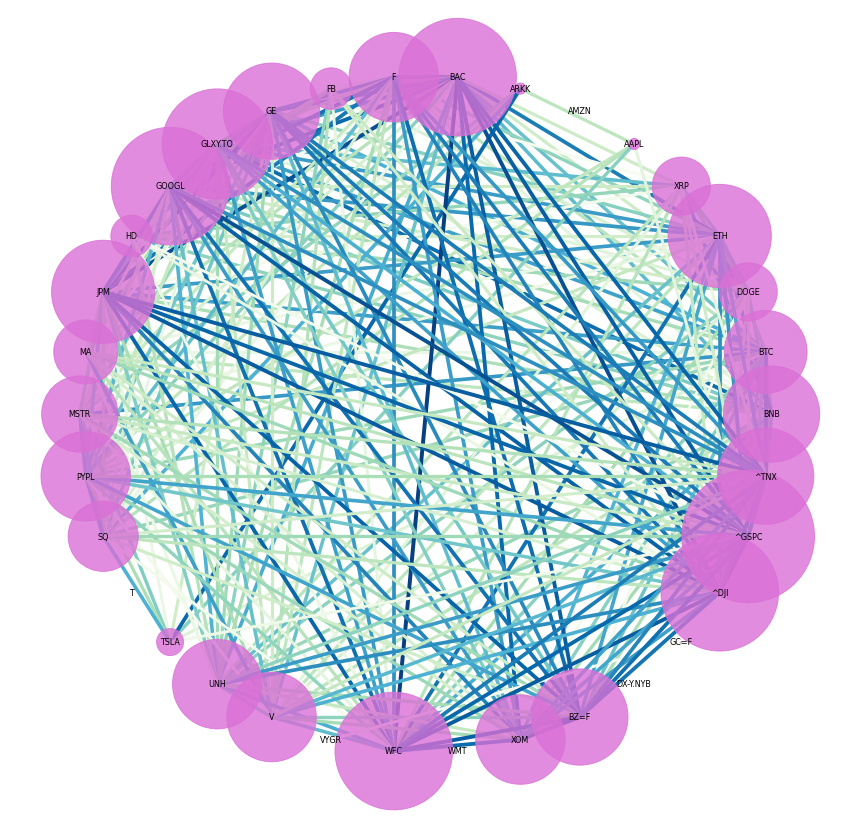

In [26]:
create_corr_network(PG, corr_direction="positive",min_correlation=0.7)

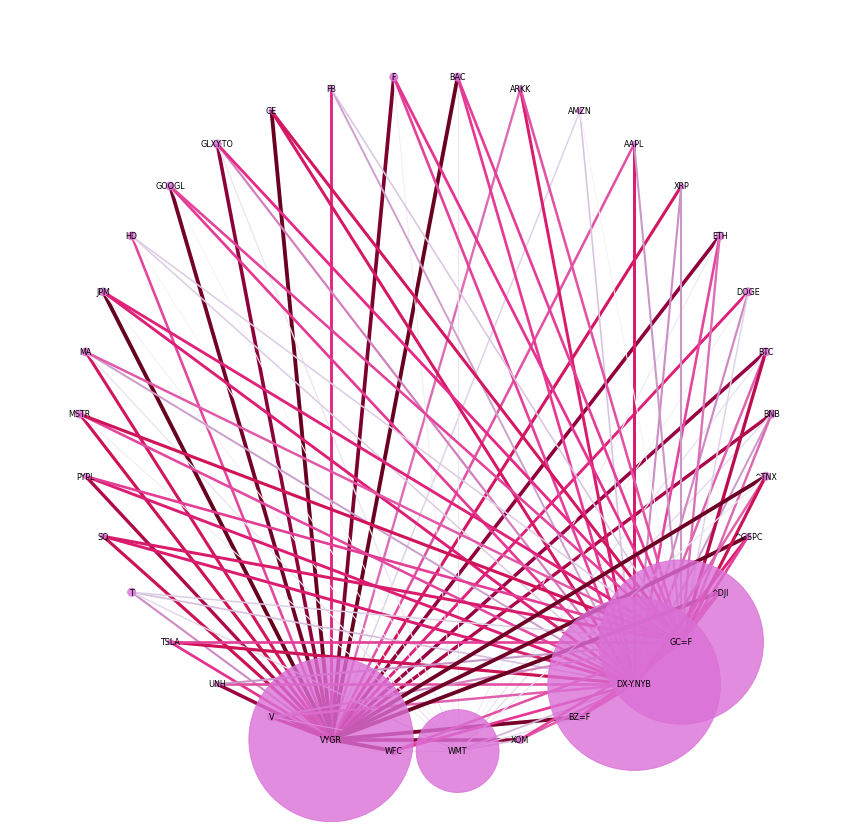

In [27]:
create_corr_network(PG, corr_direction="negative",min_correlation=0.7)

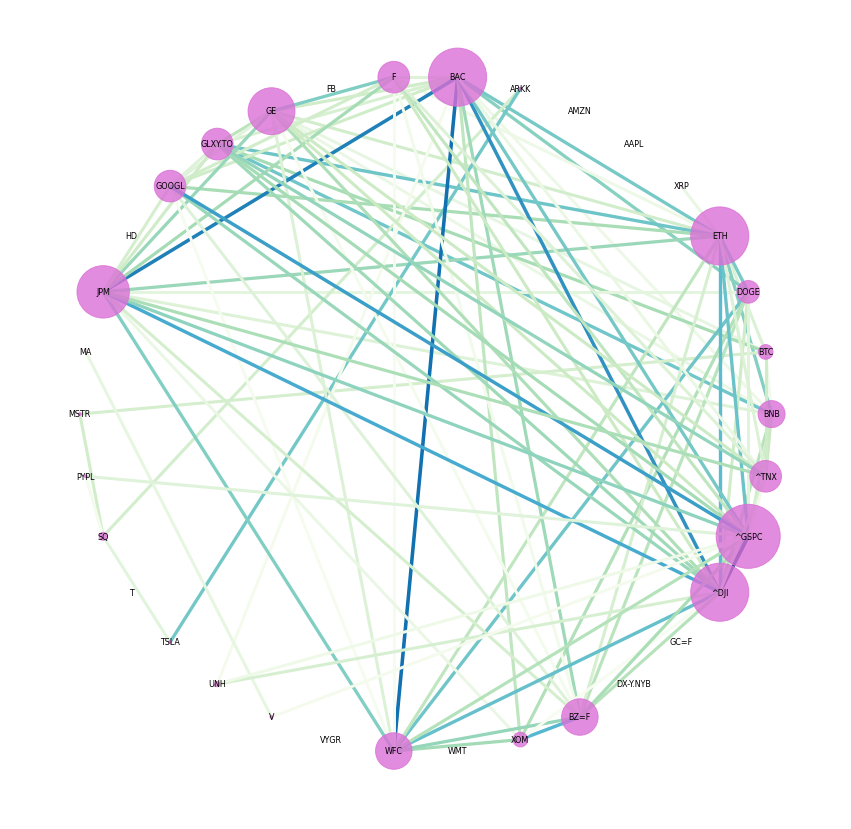

In [28]:
create_corr_network(KG, corr_direction="positive",min_correlation=0.7)

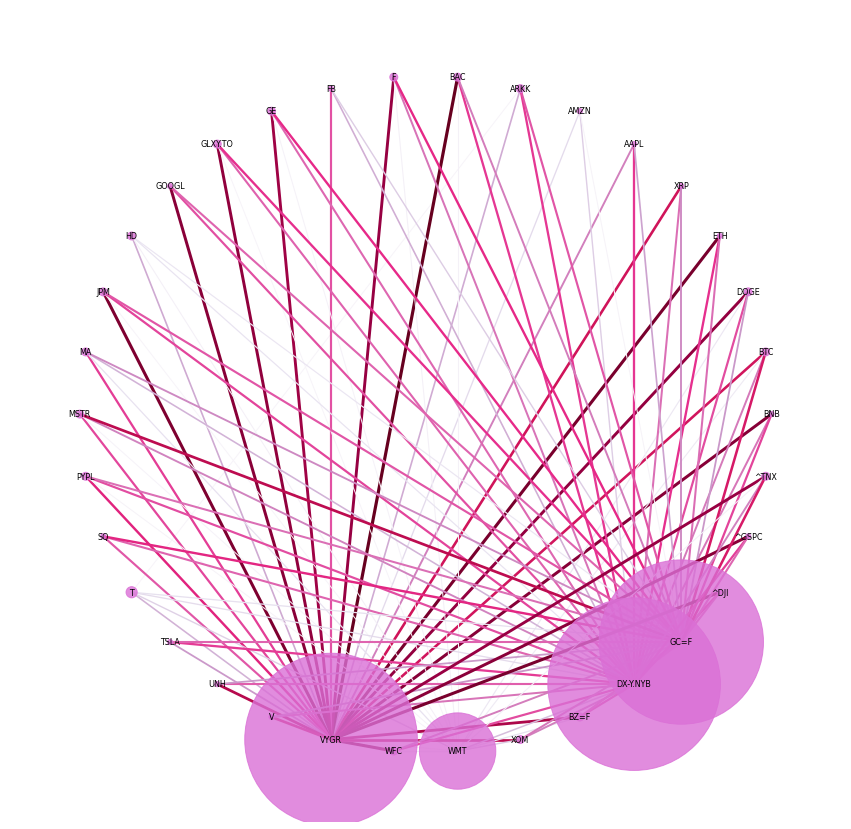

In [29]:
create_corr_network(KG, corr_direction="negative",min_correlation=0.7)

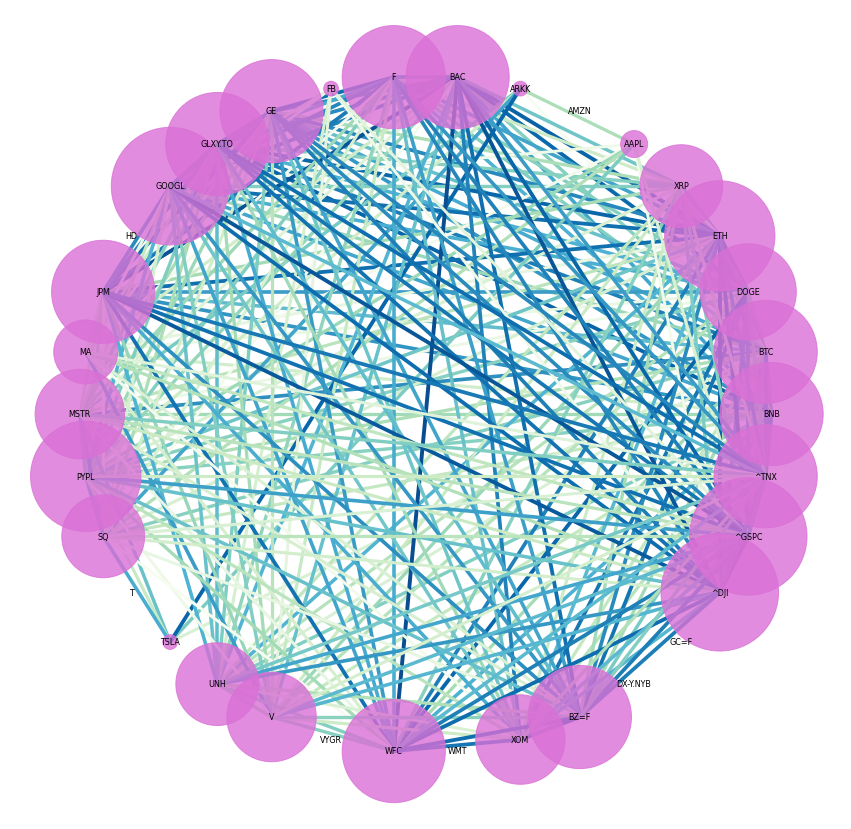

In [30]:
create_corr_network(SG, corr_direction="positive",min_correlation=0.7)

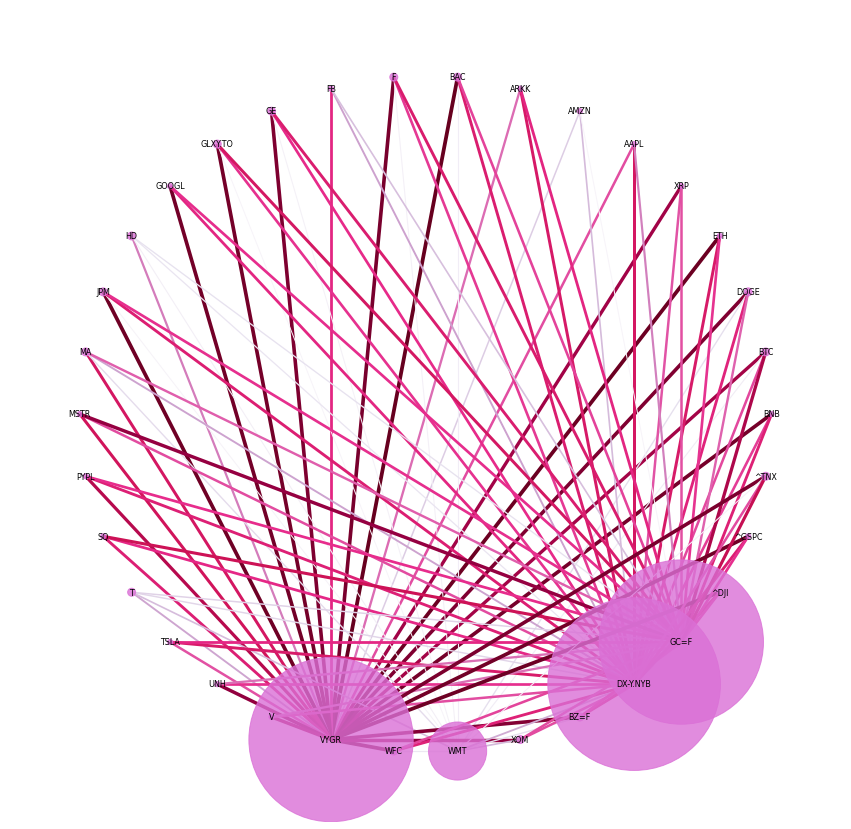

In [31]:
create_corr_network(SG, corr_direction="negative",min_correlation=0.7)